## Photon ID Run 2 basic plots with Dask

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd

import time

from dask.diagnostics import ProgressBar
from dask.distributed import Client, get_client, LocalCluster

In [37]:
cluster = LocalCluster(memory_limit='30GB', n_workers=2, threads_per_worker=1, dashboard_address=':0')
client = Client(cluster)

distributed.diskutils - INFO - Found stale lock file and directory '/mustfs/LAPP-DATA/atlas/chardong/Venv/Training_with_df/parquet/dask-worker-space/worker-2uvur9g_', purging


In [38]:
datadir = "/lapp_data/atlas/chardong/Venv/save_parquet/"

In [39]:
df_py8_yj_a = dd.read_parquet(datadir+"Py8_yj_a.parquet", engine='pyarrow', blocksize='500MB')
df_py8_yj_d = dd.read_parquet(datadir+"Py8_yj_d.parquet", engine='pyarrow', blocksize='500MB')
df_py8_yj_e = dd.read_parquet(datadir+"Py8_yj_e.parquet", engine='pyarrow', blocksize='500MB')

In [40]:
df_she_yj_a = dd.read_parquet(datadir+"She_yj_a.parquet", engine='pyarrow', blocksize='500MB')
df_she_yj_d = dd.read_parquet(datadir+"She_yj_d.parquet", engine='pyarrow', blocksize='500MB')
df_she_yj_e = dd.read_parquet(datadir+"She_yj_e.parquet", engine='pyarrow', blocksize='500MB')

In [51]:
df_py8_jj_a = dd.read_parquet(datadir+"Py8_jj_a.parquet", engine='pyarrow', blocksize='500MB')
df_py8_jj_d = dd.read_parquet(datadir+"Py8_jj_d.parquet", engine='pyarrow', blocksize='500MB')
df_py8_jj_e = dd.read_parquet(datadir+"Py8_jj_e.parquet", engine='pyarrow', blocksize='500MB')

In [52]:
def mesure_performance(path, blocksize):
    # Démarrer le chronomètre
    start_time = time.time()
    # Charger les données avec un blocksize spécifique
    df_py8_jj_e = dd.read_parquet(path, engine='pyarrow', blocksize=blocksize)
    
    # Opération dont on veut mesurer le temps d'exécution
    df_py8_jj_e.head()
    
    # Arrêter le chronomètre
    end_time = time.time()
    
    # Calculer la durée
    duration = end_time - start_time
    print(f"Temps d'exécution avec blocksize {blocksize}: {duration:.3f} secondes")
    return duration

# Chemin vers le fichier Parquet
data_path = datadir+"Py8_jj_e.parquet"

# Mesurer la performance avec différents blocksizes
blocksize_128MB = '128MB'
blocksize_256MB = '256MB'
time_128MB = mesure_performance(data_path, blocksize_128MB)
time_256MB = mesure_performance(data_path, blocksize_256MB)

# Comparer les temps d'exécution
print(f"Différence de temps d'exécution: {time_256MB - time_128MB:.3f} secondes")

Temps d'exécution avec blocksize 128MB: 32.180 secondes
Temps d'exécution avec blocksize 256MB: 15.582 secondes
Différence de temps d'exécution: -16.597 secondes


In [53]:
df_py8_jj_e.head()

,y_Reta,y_Rphi,y_weta2,y_fracs1,y_weta1,y_emaxs1,y_f1,y_wtots1,y_Rhad,y_Rhad1,...,evtWeight,intLumi,xs,ge,mcWeight,lumiXsecWeight,lumiXsecWeightOriginal,xsecWeight,mcTotWeight,sumWeights
0,0.854573,0.881050,0.011165,0.684816,0.732026,-999.0,0.459108,6.177567,0.001586,0.001613,...,1.200181,58450.26141,2.433900e+09,0.074194,1.0,3.687311e+06,530012.834698,180580776.6,4.425441e+06,2.862518e+06
1,0.735759,0.762082,0.011865,0.702930,0.720364,-999.0,0.328233,3.432392,0.126333,0.016205,...,1.230358,58450.26141,2.433900e+09,0.074194,1.0,3.687311e+06,530012.834698,180580776.6,4.536714e+06,2.862518e+06
2,0.909003,0.985079,0.010618,0.675233,0.583434,-999.0,0.227226,3.536355,-0.002979,-0.000854,...,0.329354,58450.26141,2.433900e+09,0.074194,1.0,3.687311e+06,530012.834698,180580776.6,1.214431e+06,2.862518e+06
3,0.927225,0.772736,0.013605,0.948263,0.701732,-999.0,0.287921,4.257987,0.043164,0.003771,...,1.324141,58450.26141,2.433900e+09,0.074194,1.0,3.687311e+06,530012.834698,180580776.6,4.882518e+06,2.862518e+06
4,0.768907,0.585546,0.014169,0.230938,0.675297,-999.0,0.429067,5.425820,0.714370,0.371446,...,0.984129,58450.26141,2.433900e+09,0.074194,1.0,3.687311e+06,530012.834698,180580776.6,3.628790e+06,2.862518e+06


In [54]:
ddf = dd.read_parquet(datadir+"Py8_yj_a.parquet", engine='pyarrow', gather_statistics=True)
ddf.head()

,y_Reta,y_Rphi,y_weta2,y_fracs1,y_weta1,y_emaxs1,y_f1,y_wtots1,y_Rhad,y_Rhad1,...,evtWeight,intLumi,xs,ge,mcWeight,lumiXsecWeight,lumiXsecWeightOriginal,xsecWeight,mcTotWeight,sumWeights
0,0.893162,0.898602,0.012661,0.423674,0.661364,-999.0,0.394853,4.793775,0.262793,0.226348,...,0.773952,36207.705215,1.723400e+11,0.000032,1.0,66706.657592,2.000493e+11,5525048.06,51627.783351,2.998941e+06
1,0.821843,0.813986,0.011472,0.330045,0.630457,-999.0,0.215349,7.426593,0.007657,0.003296,...,0.857706,36207.705215,1.723400e+11,0.000032,1.0,66706.657592,2.000493e+11,5525048.06,57214.697170,2.998941e+06
2,0.654021,0.879575,0.014878,0.242652,0.521317,-999.0,0.241375,1.531976,0.077548,0.061177,...,0.893866,36207.705215,1.723400e+11,0.000032,1.0,66706.657592,2.000493e+11,5525048.06,59626.829270,2.998941e+06
3,0.954023,0.961080,0.011122,0.370756,0.728988,-999.0,0.291244,2.311160,-0.016081,-0.020624,...,0.938568,36207.705215,1.723400e+11,0.000032,1.0,66706.657592,2.000493e+11,5525048.06,62608.765746,2.998941e+06
4,0.890601,0.876521,0.010906,0.394849,0.650256,-999.0,0.357040,3.092915,-0.002251,-0.022726,...,1.074751,36207.705215,1.723400e+11,0.000032,1.0,66706.657592,2.000493e+11,5525048.06,71693.016445,2.998941e+06


In [55]:
def true_y(df):
    return df[(df['y_truth_pdgId'] == 22) & (abs(df['y_truth_mother_pdgId']) < 100)]

def true_j(df):
    return df[(abs(df['y_truth_pdgId']) != 11) & 
              ( (df['y_truth_pdgId'] != 22) | 
               ((df['y_truth_pdgId'] == 22) & (abs(df['y_truth_mother_pdgId']) > 100)) ) ]

In [56]:
#Concatenate all MC periods
#df_py8_yj = dd.concat([df_py8_yj_a, df_py8_yj_d, df_py8_yj_e])

In [57]:
# Application de map_partitions
filtered_y = df_py8_yj_d.map_partitions(true_y)
filtered_j = df_py8_yj_d.map_partitions(true_j)

In [58]:
# Calcul des données avant traçage avec Dask
y_data = filtered_y['y_pt'].compute()
y_weights = filtered_y['mcTotWeight'].compute()

j_data = filtered_j['y_pt'].compute()
j_weights = filtered_j['mcTotWeight'].compute()

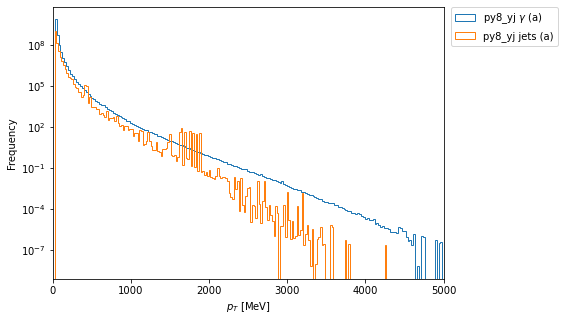

In [59]:
# Traçage avec Matplotlib
plt.figure(figsize=(7,5))
plt.hist(y_data, weights=y_weights, histtype='step', bins=200, log=True, label='py8_yj $\gamma$ (a)')
plt.hist(j_data, weights=j_weights, histtype='step', bins=200, log=True, label='py8_yj jets (a)')

plt.xlim(0, 5000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('$p_T$ [MeV]')
plt.ylabel('Frequency')
plt.show()